### Install packages

In [1]:
%pip install scipy
%pip install numpy

  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl (44.8 MB)
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.9 MB 13.3 MB/s eta 0:00:01
     ---- ----------------------------------- 1.5/12.9 MB 15.9 MB/s eta 0:00:01
     -------- ------------------------------- 2.6/12.9 MB 18.4 MB/s eta 0:00:01
     ---------- ----------------------------- 3.4/12.9 MB 18.2 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.9 MB 17.4 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.9 MB 19.4 MB/s eta 0:00:01
     ------------------ --------------------- 6.1/12.9 MB 18.5 MB/s eta 0:00:01
     -------------------- ------------------- 6.7/12.9 MB 18.7 MB/s eta 0:00:01
     ---------------------- ----------------- 7.2/12.9 MB 17.6 MB/s eta 0:00:01
     -------------------------- ------------- 8.5/12.9 MB 18.1 MB/s eta 0:00:01
     ------------------------------ --------- 9.8/12.9 MB 19.6 M


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install matplotlib scikit-learn

  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl (7.8 MB)
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-win_amd64.whl (55 kB)
  Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl (2.6 MB)
     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.2 MB 2.2 MB/s eta 0:00:01
     --------- ------------------------------ 0.5/2.2 MB 5.3 MB/s eta 0:00:01
     -------------------------------- ------- 1.8/2.2 MB 12.7 MB/s eta 0:00:01
     ---------------------------------------  2.2/2.2 MB 14.0 MB/s eta 0:00:01
     ---------------------------------------- 2.2/2.2 MB 11.8 MB/s eta 0:00:00
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached contourpy-1.3.0-cp310-cp310-win_amd64.whl (216 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Balanced k-means function
cf. https://link.springer.com/chapter/10.1007/978-3-662-44415-3_4

In [10]:
import numpy as np
from scipy.optimize import linear_sum_assignment

'''
def balanced_kmeans(X, k, max_iter=100, tol=1e-4):
    """
    Perform balanced k-means clustering.

    Parameters:
    - X: array-like of shape (n_samples, n_features)
    - k: number of clusters
    - max_iter: maximum number of iterations
    - tol: tolerance for convergence

    Returns:
    - labels: array of shape (n_samples,) with cluster assignments
    - centroids: array of shape (k, n_features)
    """
    n_samples, n_features = X.shape

    # Determine the cluster sizes
    base_size = n_samples // k
    remainder = n_samples % k
    cluster_sizes = [base_size + 1 if i < remainder else base_size for i in range(k)]

    # Initialize centroids randomly from data points
    rng = np.random.default_rng()
    centroids = X[rng.choice(n_samples, k, replace=False)]
    labels = np.zeros(n_samples, dtype=int)

    for iteration in range(max_iter):
        # Expand centroids to match slots
        centroids_expanded = np.vstack([
            np.tile(centroids[i], (cluster_sizes[i], 1))
            for i in range(k)
        ])

        # Compute cost matrix (squared Euclidean distances)
        cost_matrix = np.linalg.norm(
            X[:, np.newaxis] - centroids_expanded[np.newaxis, :],
            axis=2
        ) ** 2

        # Solve the assignment problem using the Hungarian algorithm
        _, col_ind = linear_sum_assignment(cost_matrix)

        # Map assignments to cluster labels
        slot_to_cluster = np.hstack([
            np.full(size, cluster_idx)
            for cluster_idx, size in enumerate(cluster_sizes)
        ])
        new_labels = slot_to_cluster[col_ind]

        # Update centroids
        new_centroids = np.array([
            X[new_labels == c].mean(axis=0) if np.any(new_labels == c)
            else X[rng.choice(n_samples)]
            for c in range(k)
        ])

        # Check for convergence
        shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        if np.all(shifts < tol):
            break

        centroids = new_centroids
        labels = new_labels

    return labels, centroids
'''

def balanced_kmeans(X, k, max_iter=100, tol=1e-4):
    """
    Perform balanced k-means clustering on the given data.

    Parameters:
    - X: array-like of shape (n_samples, n_features)
    - k: number of clusters
    - max_iter: maximum number of iterations
    - tol: tolerance for convergence

    Returns:
    - labels: array of shape (n_samples,) with cluster assignments
    - centroids: array of shape (k, n_features)
    """
    n_samples, n_features = X.shape

    # Determine the cluster sizes
    base_size = n_samples // k
    remainder = n_samples % k
    cluster_sizes = [base_size + 1 if i < remainder else base_size for i in range(k)]

    # Initialize centroids randomly from data points
    rng = np.random.default_rng()
    centroids = X[rng.choice(n_samples, k, replace=False)]
    labels = np.zeros(n_samples, dtype=int)

    for iteration in range(max_iter):
        # Expand centroids to match slots
        centroids_expanded = np.vstack([
            np.tile(centroids[i], (cluster_sizes[i], 1))
            for i in range(k)
        ])

        # Compute cost matrix (squared Euclidean distances)
        cost_matrix = np.linalg.norm(
            X[:, np.newaxis] - centroids_expanded[np.newaxis, :],
            axis=2
        ) ** 2

        # Solve the assignment problem using the Hungarian algorithm
        # cf. https://en.wikipedia.org/wiki/Assignment_problem
        _, col_ind = linear_sum_assignment(cost_matrix)

        # Map assignments to cluster labels
        slot_to_cluster = np.hstack([
            np.full(size, cluster_idx)
            for cluster_idx, size in enumerate(cluster_sizes)
        ])
        new_labels = slot_to_cluster[col_ind]

        # Update centroids
        new_centroids = np.array([
            X[new_labels == c].mean(axis=0) if np.any(new_labels == c)
            else centroids[c]
            for c in range(k)
        ])

        # Check for convergence
        shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        if np.all(shifts < tol):
            break

        centroids = new_centroids
        labels = new_labels

    return labels, centroids



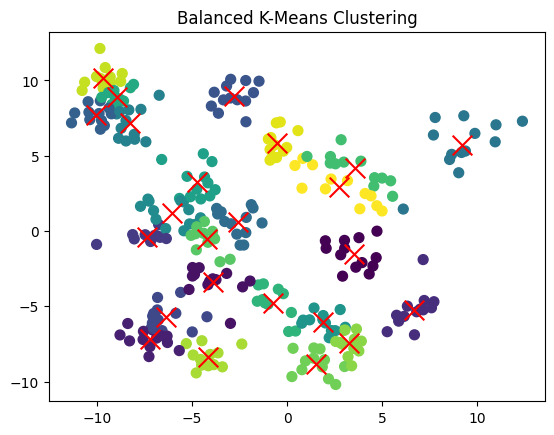

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=24, random_state=42)

# Perform balanced k-means clustering
k = 24
labels, centroids = balanced_kmeans(X, k)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title('Balanced K-Means Clustering')
plt.show()

### Adding outlier filter for reasonable clusters with DBSCAN
This method needs good hyperparameter for good performance...

In [16]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import DBSCAN

def dbscan_balanced_kmeans(X, k, dbscan_eps=0.5, dbscan_min_samples=5, max_iter=100, tol=1e-4, assign_outliers=False):
    """
    Combine DBSCAN and Balanced K-Means to achieve robustness with outliers.

    Parameters:
    - X: array-like of shape (n_samples, n_features)
    - k: number of clusters
    - dbscan_eps: maximum distance between two samples for one to be considered as in the neighborhood of the other
    - dbscan_min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point
    - max_iter: maximum number of iterations for Balanced K-Means
    - tol: tolerance for convergence in Balanced K-Means
    - assign_outliers: bool, whether to assign outliers to the nearest cluster centroids

    Returns:
    - labels: array of shape (n_samples,) with cluster assignments (-1 for outliers)
    - centroids: array of shape (k, n_features)
    """
    # Step 1: Run DBSCAN to detect outliers
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    dbscan_labels = dbscan.fit_predict(X)

    # Identify core samples (non-outliers) and noise samples (outliers)
    core_mask = dbscan_labels != -1
    X_core = X[core_mask]
    n_samples_core = X_core.shape[0]

    # DEBUG: Print number of outliers and core samples
    print(f"Number of outliers: {np.sum(~core_mask)}")
    print(f"Number of core samples: {n_samples_core}")

    if n_samples_core < k:
        raise ValueError("Not enough core samples to form k clusters after DBSCAN.")

    # Step 2: Proceed with Balanced K-Means on core samples
    labels_core, centroids = balanced_kmeans(X_core, k, max_iter=max_iter, tol=tol)

    # Step 3: Create final labels array
    labels = np.full(X.shape[0], -1, dtype=int)  # Initialize all labels as -1 (outliers)
    labels[core_mask] = labels_core  # Assign labels to core samples

    # Step 4: Optionally, assign outliers to nearest cluster centroids
    if assign_outliers:
        X_outliers = X[~core_mask]
        if X_outliers.shape[0] > 0:
            # Compute distances from outliers to centroids
            distances = np.linalg.norm(X_outliers[:, np.newaxis] - centroids[np.newaxis, :], axis=2)
            # Assign each outlier to the nearest centroid
            nearest_clusters = np.argmin(distances, axis=1)
            labels[~core_mask] = nearest_clusters  # Assign outliers to nearest clusters

    # If assign_outliers is False, labels for outliers remain -1

    return labels, centroids


Number of outliers: 68
Number of core samples: 252


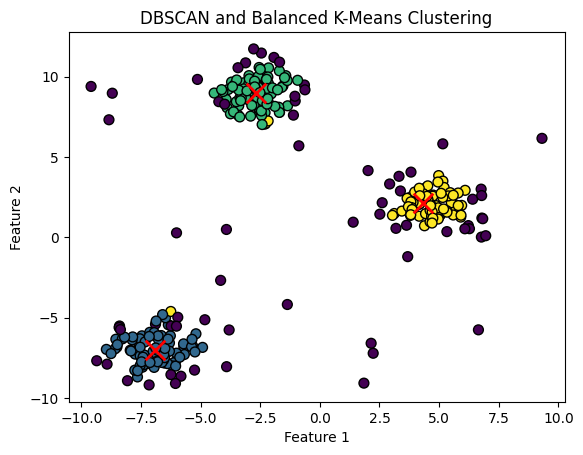

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with outliers
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
# Add random outliers
rng = np.random.RandomState(42)
outliers = rng.uniform(low=-10, high=10, size=(20, 2))
X = np.vstack([X, outliers])

# Parameters
k = 3
dbscan_eps = 0.5
dbscan_min_samples = 5

# Perform combined DBSCAN and Balanced K-Means clustering
labels, centroids = dbscan_balanced_kmeans(X, k, dbscan_eps, dbscan_min_samples)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidth=2)
plt.title('DBSCAN and Balanced K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Number of outliers: 256
Number of core samples: 44


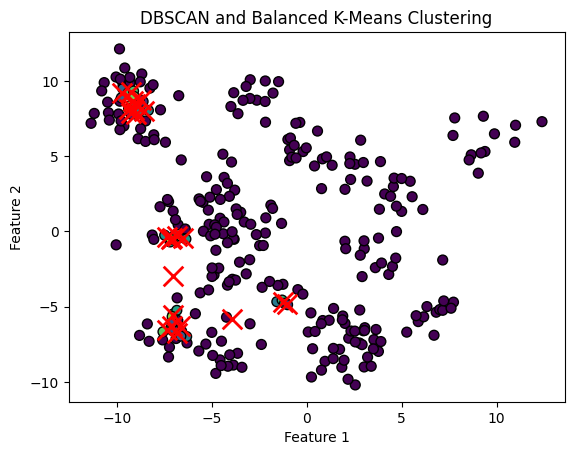

In [18]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=24, random_state=42)

# Perform balanced k-means clustering
k = 24
# Perform combined DBSCAN and Balanced K-Means clustering
labels, centroids = dbscan_balanced_kmeans(X, k, dbscan_eps, dbscan_min_samples)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidth=2)
plt.title('DBSCAN and Balanced K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()